In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [71]:
import seaborn as sns

In [72]:
sns.set_context('poster')

In [3]:
from kid_readout import *

In [4]:
ncf = NCFile('/artemis/readout/2016-04-11_211606_lo_1110.0.nc',cache_s21_raw=True)

In [44]:
mmw = ncf.MMWSweepStreams0

In [6]:
swa = mmw.sweep

In [9]:
meas = mmw.streams[250]

In [24]:
swp.s21_raw_stack.shape

(98, 4096)

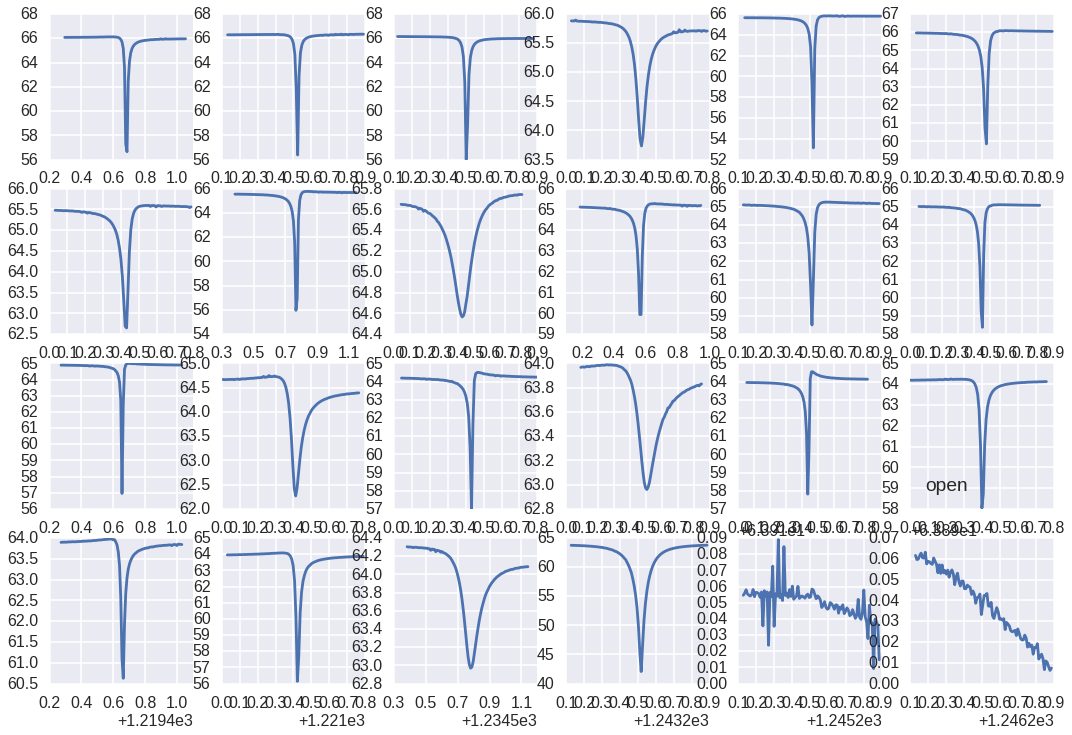

In [86]:
fig,axs = subplots(4,6,figsize=(18,12))
for k in range(24):
    ax = axs.flatten()[k]
    swp = swa.sweep(k)
    if k==17:
        ax.text(0.1,0.1,"open",va='bottom',transform=ax.transAxes)
    ax.plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))

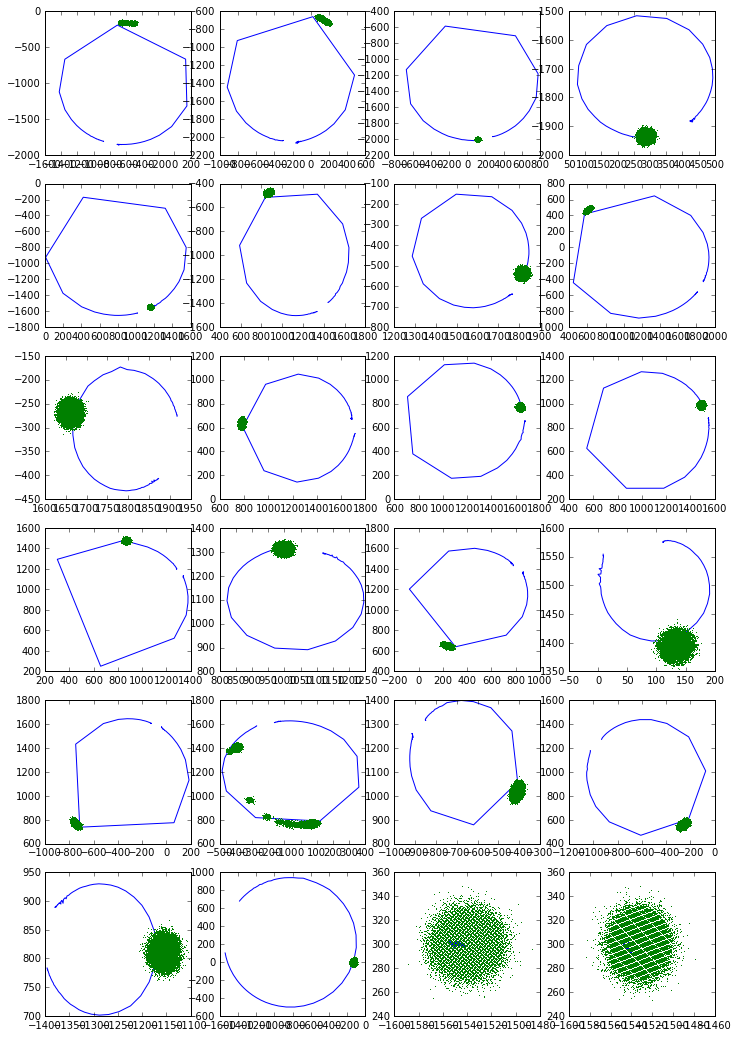

In [10]:
fig,axs = subplots(6,4,figsize=(12,18))
for k in range(24):
    ax = axs.flatten()[k]
    swp = swa.sweep(k)
    #ax.plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))
    s21 = swp.s21_points
    plot_ri(s21,ax=ax)
    plot_ri(meas.stream(k).s21_raw,',',ax=ax)

In [12]:
from kid_readout.measurement import basic

In [47]:
class MmwResponse():
    pass
responses =[]
for k in range(21):
    print k
    mmw_freq = np.linspace(140e9, 165e9, 500)
    folded = np.zeros((500,256),dtype='complex')
    zbd = np.zeros((500,))
    res_sweep = basic.SingleResonatorSweep(swa.sweep(k).streams)
    for m in range(500):
        sss = basic.SingleSweepStream(res_sweep,mmw.streams[m].stream(k))
        sss._set_q_and_x(deglitch=False)
        zbd[m] = mmw.streams[m].state['lockin_voltage']
        x = sss.x.reshape((-1,256)).mean(0)
        folded[m,:] = x
    mmwr = MmwResponse()
    mmwr.mmw_freq = mmw_freq
    mmwr.sweep = swa.sweep(k)
    mmwr.zbd = zbd
    mmwr.folded = folded
    responses.append(mmwr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [97]:
50e6/16e6

3.125

In [30]:
len(responses)

21

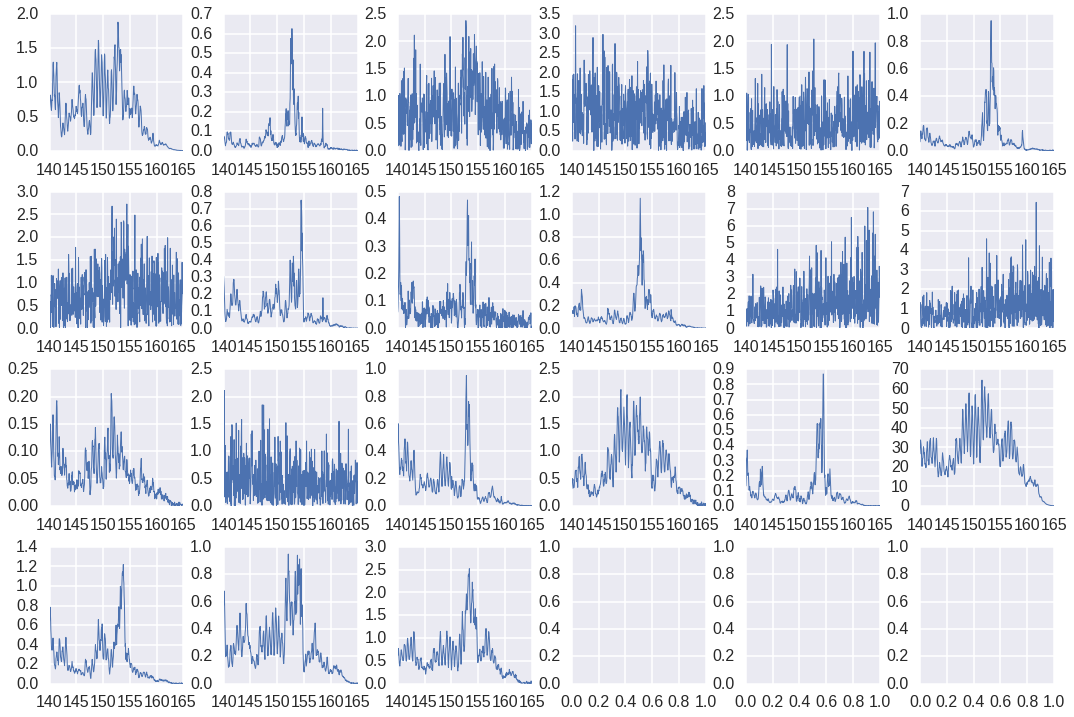

In [89]:
fig,axs = subplots(4,6,figsize=(18,12))
fig.subplots_adjust(hspace=0.3,wspace=0.3)
for k in range(21):
    ax = axs.flatten()[k]
    mmwr = responses[k]
    mmwresp = np.abs(mmwr.folded[:,32:96].mean(1)-mmwr.folded[:,140:240].mean(1))
    ax.plot(mmwr.mmw_freq/1e9,mmwresp*1e6,lw=1)

In [79]:
range(21)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

(-80, -40)

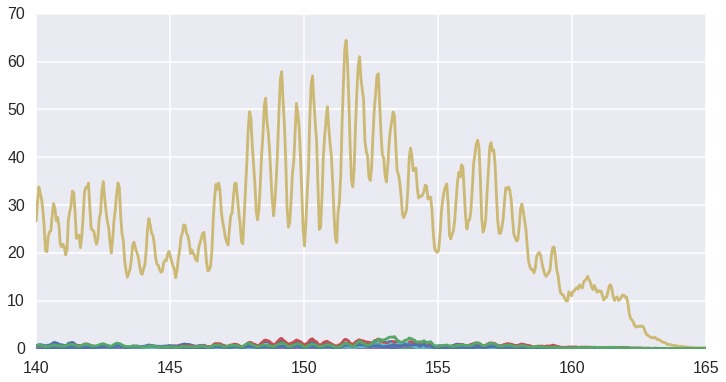

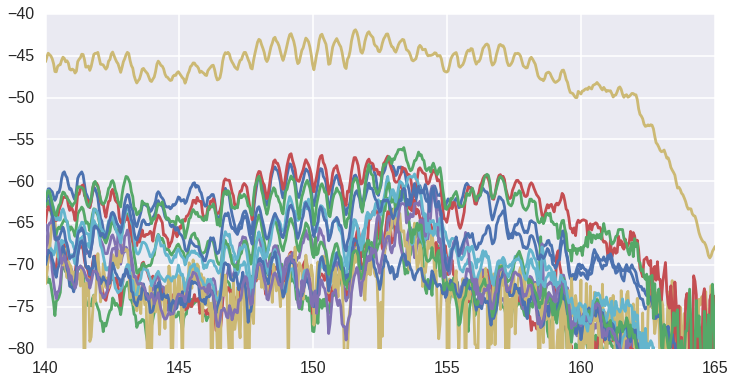

In [80]:
valid = [0, 1, 5, 7, 8, 9,  12, 14, 15, 16, 17, 18, 19, 20]
fig,ax = subplots(figsize=(12,6))
for k in valid:
    mmwr = responses[k]
    mmwresp = np.abs(mmwr.folded[:,32:96].mean(1)-mmwr.folded[:,140:240].mean(1))
    ax.plot(mmwr.mmw_freq/1e9,mmwresp*1e6)
fig,ax = subplots(figsize=(12,6))
for k in valid:
    mmwr = responses[k]
    mmwresp = np.abs(mmwr.folded[:,32:96].mean(1)-mmwr.folded[:,140:240].mean(1))
    ax.plot(mmwr.mmw_freq/1e9,10*np.log10(mmwresp))
ax.set_ylim(-80,-40)

In [53]:
hincf = NCFile('/artemis/readout/2016-04-11_214635_lo_1570.0.nc',cache_s21_raw=True)

In [54]:
himmw = hincf.MMWSweepStreams0

In [55]:
hiswa = himmw.sweep

In [56]:
himeas = himmw.streams[250]

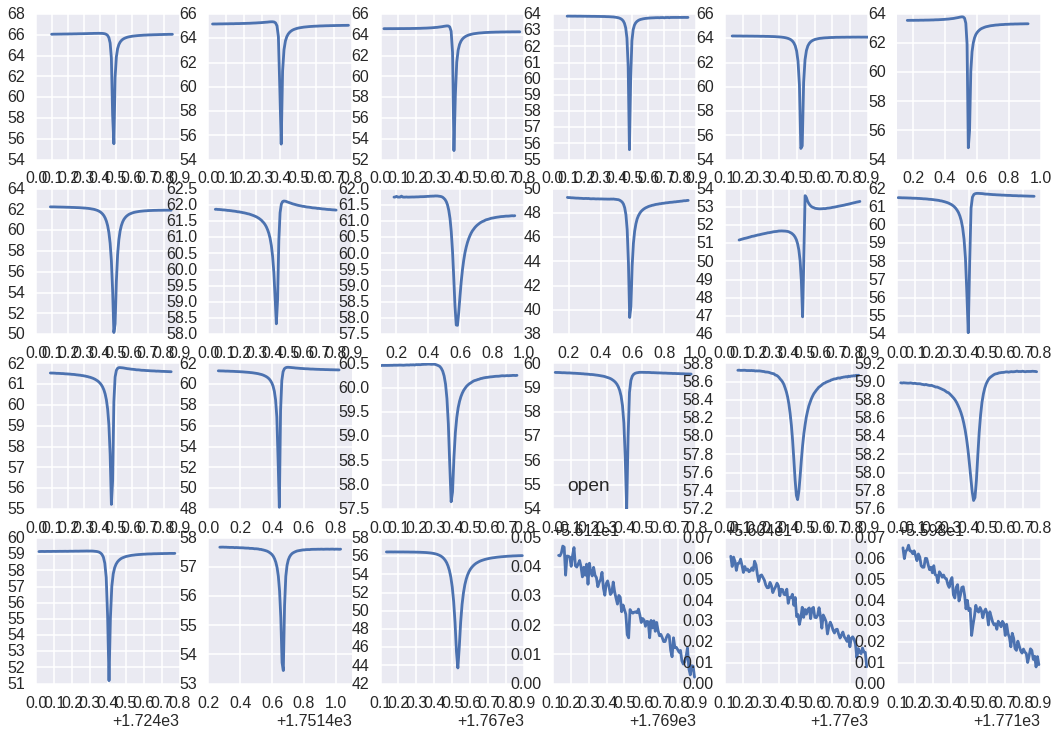

In [85]:
fig,axs = subplots(4,6,figsize=(18,12))
for k in range(24):
    ax = axs.flatten()[k]
    swp = hiswa.sweep(k)
    ax.plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))
    if k==15:
        ax.text(0.1,0.1,"open",va='bottom',transform=ax.transAxes)

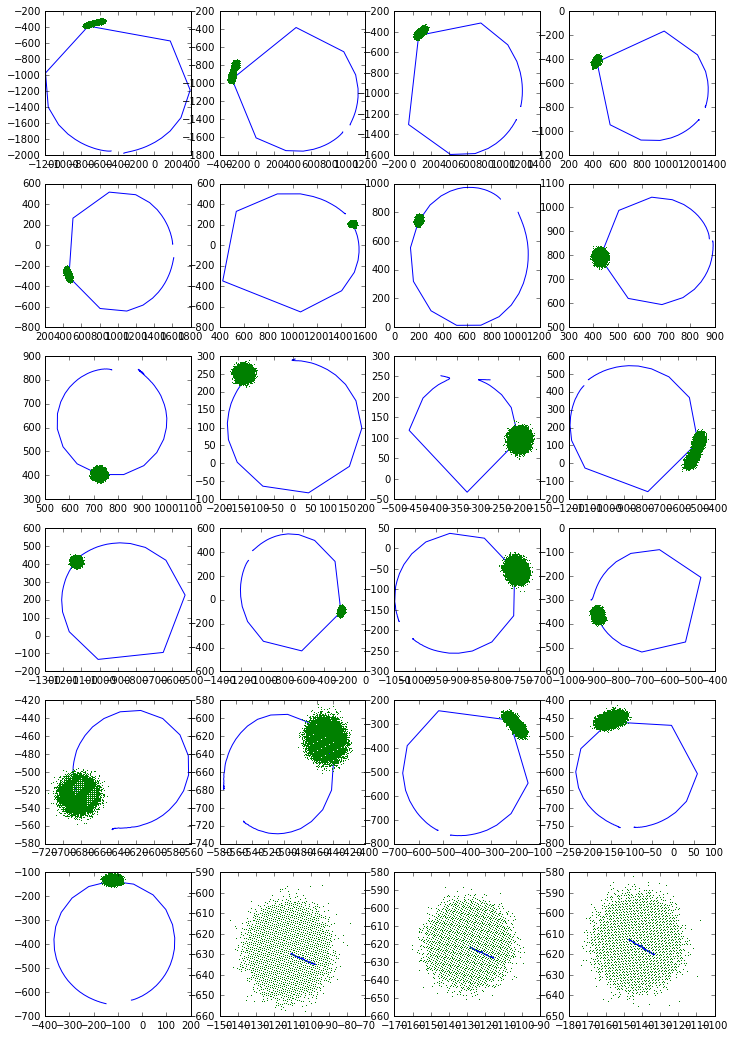

In [57]:
fig,axs = subplots(6,4,figsize=(12,18))
for k in range(24):
    ax = axs.flatten()[k]
    swp = hiswa.sweep(k)
    #ax.plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))
    s21 = swp.s21_points
    plot_ri(s21,ax=ax)
    plot_ri(himeas.stream(k).s21_raw,',',ax=ax)

In [58]:
class MmwResponse():
    pass
hiresponses =[]
for k in range(21):
    print k
    mmw_freq = np.linspace(140e9, 165e9, 500)
    folded = np.zeros((500,256),dtype='complex')
    zbd = np.zeros((500,))
    res_sweep = basic.SingleResonatorSweep(hiswa.sweep(k).streams)
    for m in range(500):
        sss = basic.SingleSweepStream(res_sweep,himmw.streams[m].stream(k))
        sss._set_q_and_x(deglitch=False)
        zbd[m] = himmw.streams[m].state['lockin_voltage']
        x = sss.x.reshape((-1,256)).mean(0)
        folded[m,:] = x
    mmwr = MmwResponse()
    mmwr.mmw_freq = mmw_freq
    mmwr.sweep = res_sweep
    mmwr.zbd = zbd
    mmwr.folded = folded
    hiresponses.append(mmwr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


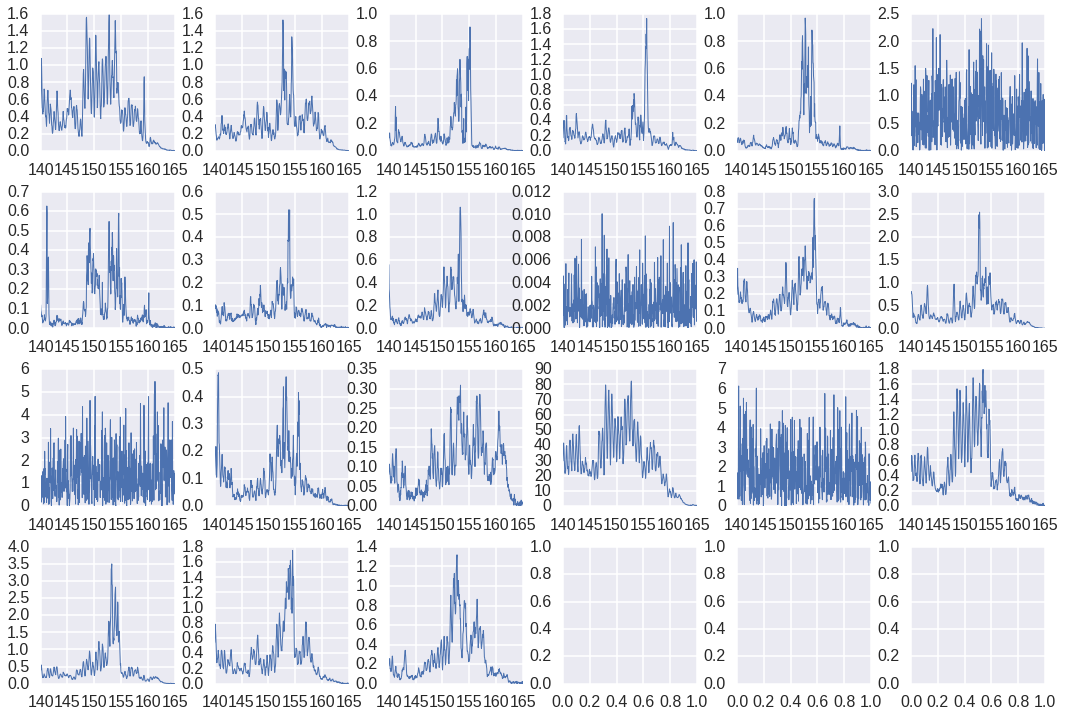

In [91]:
fig,axs = subplots(4,6,figsize=(18,12))
fig.subplots_adjust(hspace=0.3,wspace=0.3)
for k in range(21):
    ax = axs.flatten()[k]
    mmwr = hiresponses[k]
    mmwresp = np.abs(mmwr.folded[:,32:96].mean(1)-mmwr.folded[:,140:240].mean(1))
    ax.plot(mmwr.mmw_freq/1e9,mmwresp*1e6,lw=1)

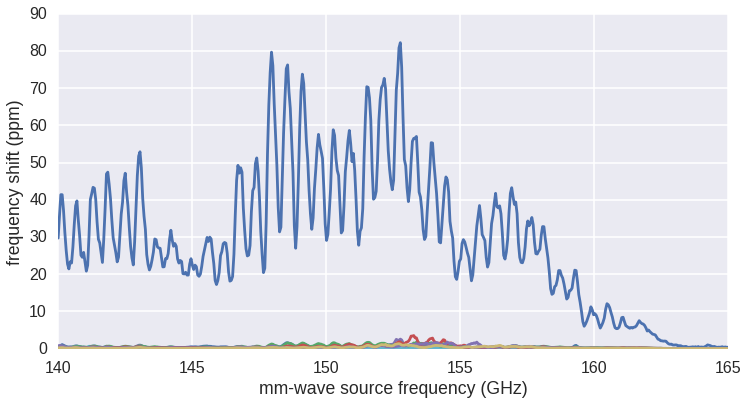

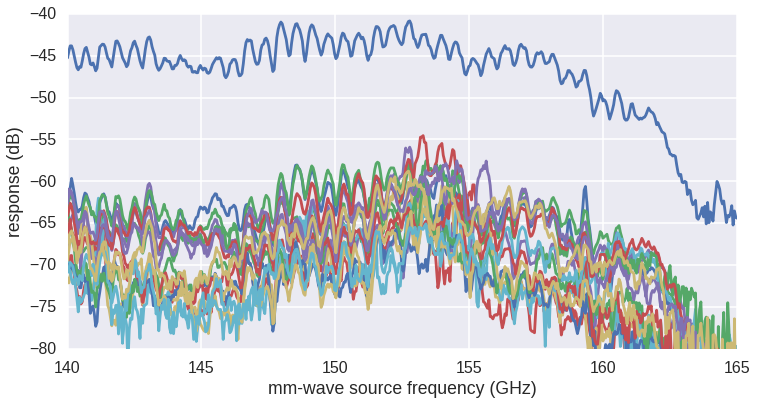

In [78]:
fig,ax = subplots(figsize=(12,6))
for k in [0,1,2,3,4,6,7,8,10,11,13,14,15,17,18,19,20]:
    mmwr = hiresponses[k]
    mmwresp = np.abs(mmwr.folded[:,32:96].mean(1)-mmwr.folded[:,140:240].mean(1))
    ax.plot(mmwr.mmw_freq/1e9,mmwresp*1e6)
ax.set_xlabel('mm-wave source frequency (GHz)')
ax.set_ylabel('frequency shift (ppm)')
fig,ax = subplots(figsize=(12,6))
for k in [0,1,2,3,4,6,7,8,10,11,13,14,15,17,18,19,20]:
    mmwr = hiresponses[k]
    mmwresp = np.abs(mmwr.folded[:,32:96].mean(1)-mmwr.folded[:,140:240].mean(1))
    ax.plot(mmwr.mmw_freq/1e9,10*np.log10(mmwresp))
ax.set_ylim(-80,-40)
ax.set_ylabel('response (dB)')
ax.set_xlabel('mm-wave source frequency (GHz)')

In [62]:
open_hi = hiresponses[15]
open_lo = responses[17]
hi_resp = np.abs(open_hi.folded[:,32:96].mean(1)-open_hi.folded[:,140:240].mean(1))
lo_resp = np.abs(open_lo.folded[:,32:96].mean(1)-open_lo.folded[:,140:240].mean(1))

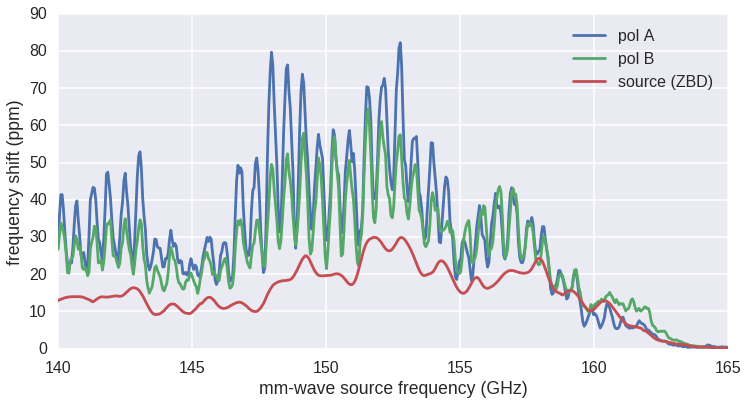

In [74]:
fig,ax = subplots(figsize=(12,6))
ax.plot(open_hi.mmw_freq/1e9,hi_resp*1e6,label='pol A')
ax.plot(open_lo.mmw_freq/1e9,lo_resp*1e6,label='pol B')
ax.plot(open_lo.mmw_freq/1e9,open_hi.zbd*10e3,label='source (ZBD)')
ylabel('frequency shift (ppm)')
xlabel('mm-wave source frequency (GHz)')
legend(loc='upper right')

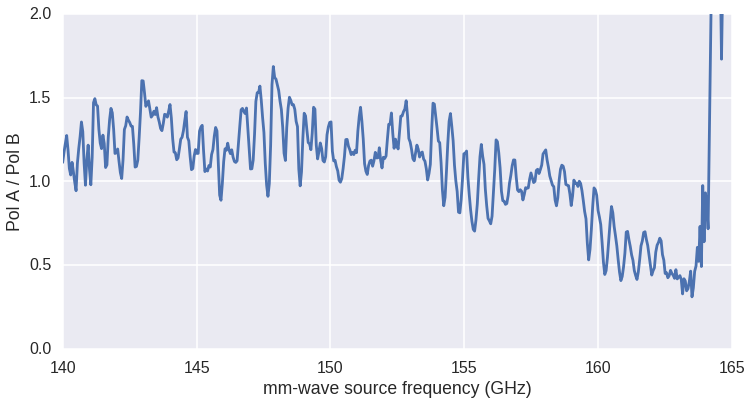

In [95]:
fig,ax = subplots(figsize=(12,6))
ax.plot(open_hi.mmw_freq/1e9,hi_resp/lo_resp)
xlabel('mm-wave source frequency (GHz)')
legend(loc='upper right')
ax.set_ylim(0,2)
ax.set_ylabel('Pol A / Pol B')

In [75]:
open_hi.sweep.resonator.f_0

1706813727.3662994